In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import Re_ploy_ngh as na


In [18]:
df = pd.read_csv("appartsParis.csv",header=0)
pd.set_option('display.max_rows',5) # Pour afficher juste 10  lignes
df

,Nb_pieces,Nb_chambres,Etage,Surface (en m2),Arrondissement,Prix (en K�)
0,3,4,5,67,17,770.0
1,1,2,5,26,17,321.0
...,...,...,...,...,...,...
39,2,1,2,38,15,450.0
40,4,2,8,95,15,876.0


In [19]:
df.rename(columns={ 
                    "Nb_pieces":'nb_pieces',
                    "Nb_chambres":'nb_chambres',
                    "Etage":'etage',
                    "Surface (en m2)":'surface',
                    "Arrondissement":'arrondissement',
                    "Prix (en K�)":'prix'},
          inplace=True)
df

,nb_pieces,nb_chambres,etage,surface,arrondissement,prix
0,3,4,5,67,17,770.0
1,1,2,5,26,17,321.0
...,...,...,...,...,...,...
39,2,1,2,38,15,450.0
40,4,2,8,95,15,876.0


In [20]:
#Les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nb_pieces       41 non-null     int64  
 1   nb_chambres     41 non-null     int64  
 2   etage           41 non-null     int64  
 3   surface         41 non-null     int64  
 4   arrondissement  41 non-null     int64  
 5   prix            41 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 2.0 KB


In [21]:
# Affichage de qlq statistiques
df.describe() 

,nb_pieces,nb_chambres,etage,surface,arrondissement,prix
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,2.658537,2.756098,4.097561,55.121951,14.414634,638.306098
...,...,...,...,...,...,...
75%,3.000000,4.000000,5.000000,73.000000,17.000000,815.000000
max,5.000000,5.000000,10.000000,118.000000,19.000000,1595.000000


In [22]:
# Trouver, compter et afficher les valeurs manquantes pour chaque colonne
df.isnull().sum().sort_values(ascending=False)

nb_pieces         0
nb_chambres       0
                 ..
arrondissement    0
prix              0
Length: 6, dtype: int64

In [23]:
#Regroupe chaque colonne dans un array
nb_pieces=np.array(df['nb_pieces'])
nb_chambres=np.array(df['nb_chambres'])  #arrondissement=df['arrondissement'].tolist()
etage=np.array(df['etage'])
surface=np.array(df['surface'])
arrondissement=np.array(df['arrondissement'])
prix=np.array(df['prix'])

NoteArrondissement={"6":76,"12":73.3,"15":59.1,"16":76,"17":65.3,"19":59.8}

In [24]:
def fonctCaract(Arrond,etage,nb_pieces):
    noteArrond=NoteArrondissement[str(Arrond)]
    caracteristique=noteArrond/100  +(8-etage)/8  +  nb_pieces/6
    return caracteristique

In [25]:
n=len(surface)
noteArrond=np.zeros(n)
caract=np.zeros(n)
prixAuMetre2 = prix/surface

for i in range(n):
    Arrond=arrondissement[i]
    caract[i]=fonctCaract(Arrond,etage[i],nb_pieces[i])

Text(0.5, 1.0, 'Nuage de points')

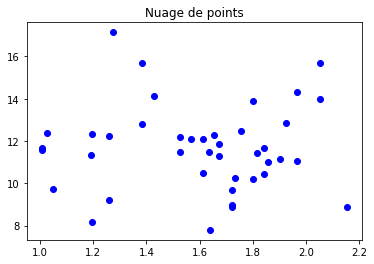

In [26]:
xi=caract
yi=prixAuMetre2
plt.scatter(xi,yi,c='b')
plt.title("Nuage de points")

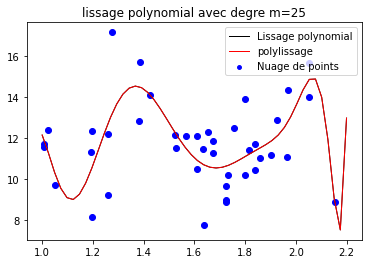

In [29]:

x=np.linspace(1.,2.2,50)
m=25 # degre de poly de reg
w=na.coef(xi,yi,m)
yp=na.poly_Regression(w,x)
erreur=0




plt.scatter(xi,yi,c='b',s=15,label='Nuage de points')
plt.plot(x,yp,c='k',lw=1,label='Lissage polynomial')
plt.plot(x,yp,'r',label='polylissage',linewidth=1)
plt.legend()
plt.scatter(xi,yi,c='b')
plt.title('lissage polynomial avec degre m=%i' %m)

plt.show() # affiche la figure a l'ecran